# Introduction

A lot of this is messy until you get to the experiments.

In [377]:
# Download libraries if needed
! pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

In [378]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm

I will be using a housing dataset that shows house prices and relating information like air quality in that area.

In [379]:
df = pd.read_csv("boston.csv")

In [380]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [381]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [382]:
df.shape

(506, 14)

In [383]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [384]:
df.duplicated().sum()

np.int64(0)

In [385]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [386]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

# Prepocessing

I'm not really sure what the B and LSTAT mean even after looking at the descriptions on kaggle so I am going to drop them.

In [387]:
df = df.drop(["B","LSTAT"], axis=1)

Other than dropping those columns the data is alread pretty clean so I will leave it for now

I want to predict the MEDV (median value) feature with all other features for my first experiment

In [388]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']]
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0)

In [389]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
print(reg.score(X_test,Y_test))

0.47937762746690904


In [390]:
Y_pred1 = reg.predict(X_test)

In [391]:
mae1 = mean_absolute_error(Y_test, Y_pred1).round(2)
mse1 = mean_squared_error(Y_test, Y_pred1).round(2)
mape1 = ((np.mean(np.abs(Y_test-Y_pred1)/Y_test) * 100)/len(df)).round(2)

print(f"MAE: {mae1}\n MSE:{mse1} \n MAPE:{mape1}%.")

MAE: 4.07
 MSE:42.39 
 MAPE:0.04%.


## I want to try to filter out outliers

In [392]:
#thank you Austin Morgan for showing me this
from scipy.stats import zscore
copyDF = df.copy()
columns_to_score = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'MEDV']
z_scores = np.abs(copyDF[columns_to_score].apply(zscore))
filtered_rows = (z_scores < 3).all(axis=1)
outlied_df = copyDF[filtered_rows]

## I want to see If I can raise the score by choosing different features to test

In [393]:
X = df[['CRIM', 'RM', 'AGE', 'RAD', 'TAX']]
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0)
reg = LinearRegression()
reg.fit(X_train, Y_train)
print(reg.score(X_test,Y_test))

0.394335770316523


In [394]:
X = df[[ 'ZN', 'INDUS', 'CHAS', 'NOX']]
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0)
reg = LinearRegression()
reg.fit(X_train, Y_train)
print(reg.score(X_test,Y_test))

0.11229665048925763


In [395]:
X = df[['CRIM', 'RM', 'RAD', 'TAX']]
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0)
reg = LinearRegression()
reg.fit(X_train, Y_train)
print(reg.score(X_test,Y_test))

0.38889059726098263


## I want to do some modeling to see what features impact the value the most

In [396]:
inputs = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']

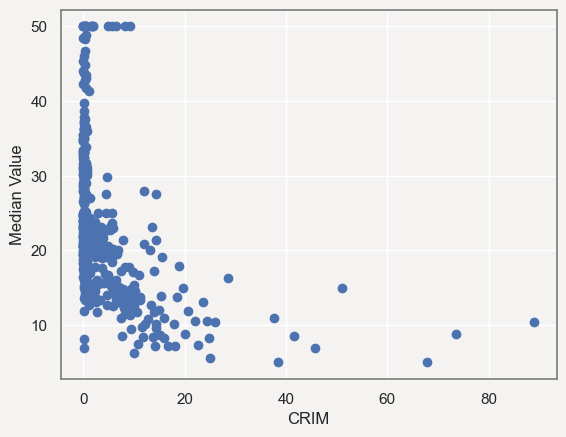

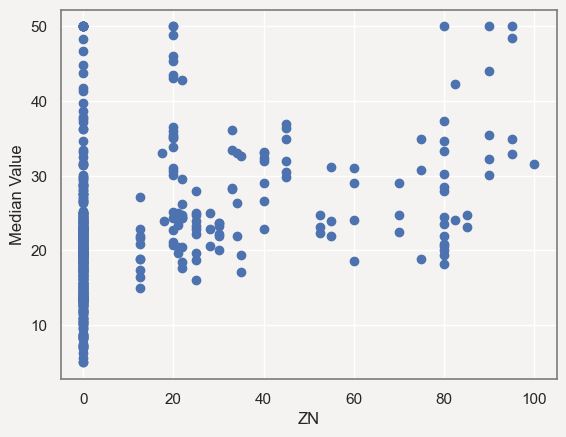

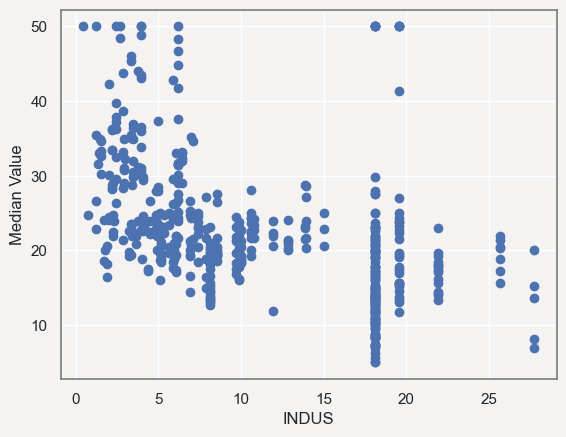

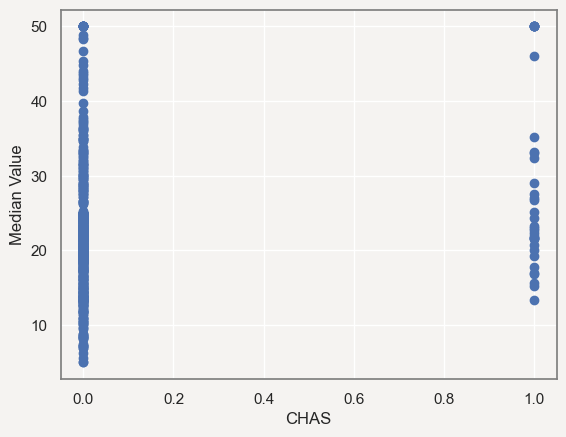

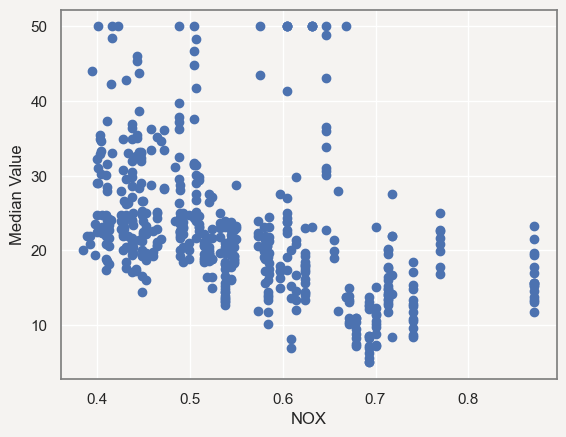

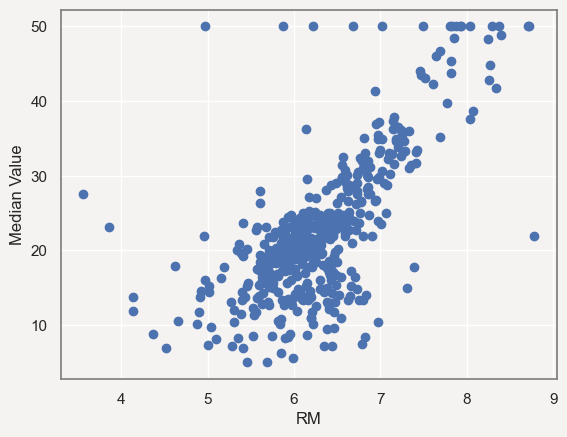

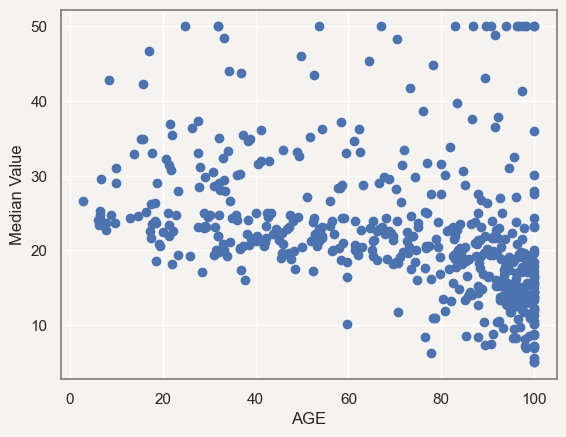

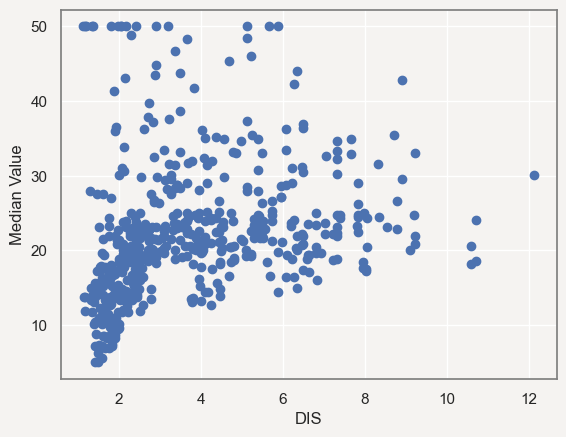

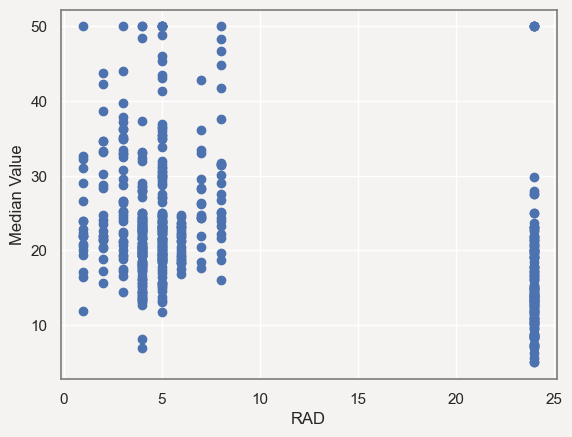

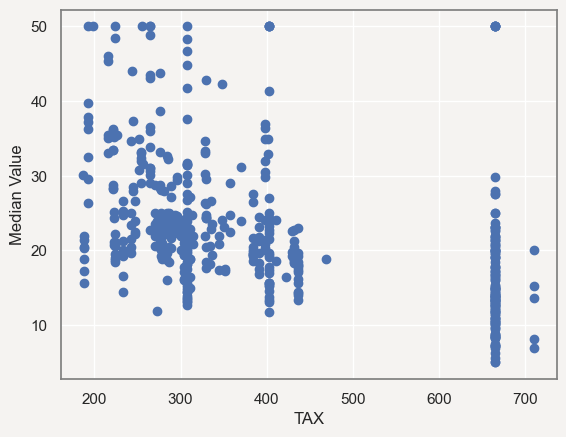

In [397]:
for feature in inputs:
    plt.scatter(df[feature], df["MEDV"])
    plt.xlabel(feature)
    plt.ylabel('Median Value')
    plt.show()

Based on these graphs I want try another model

In [398]:
X = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX']]
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0)

In [399]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
print(reg.score(X_test,Y_test))

0.4411592726934228


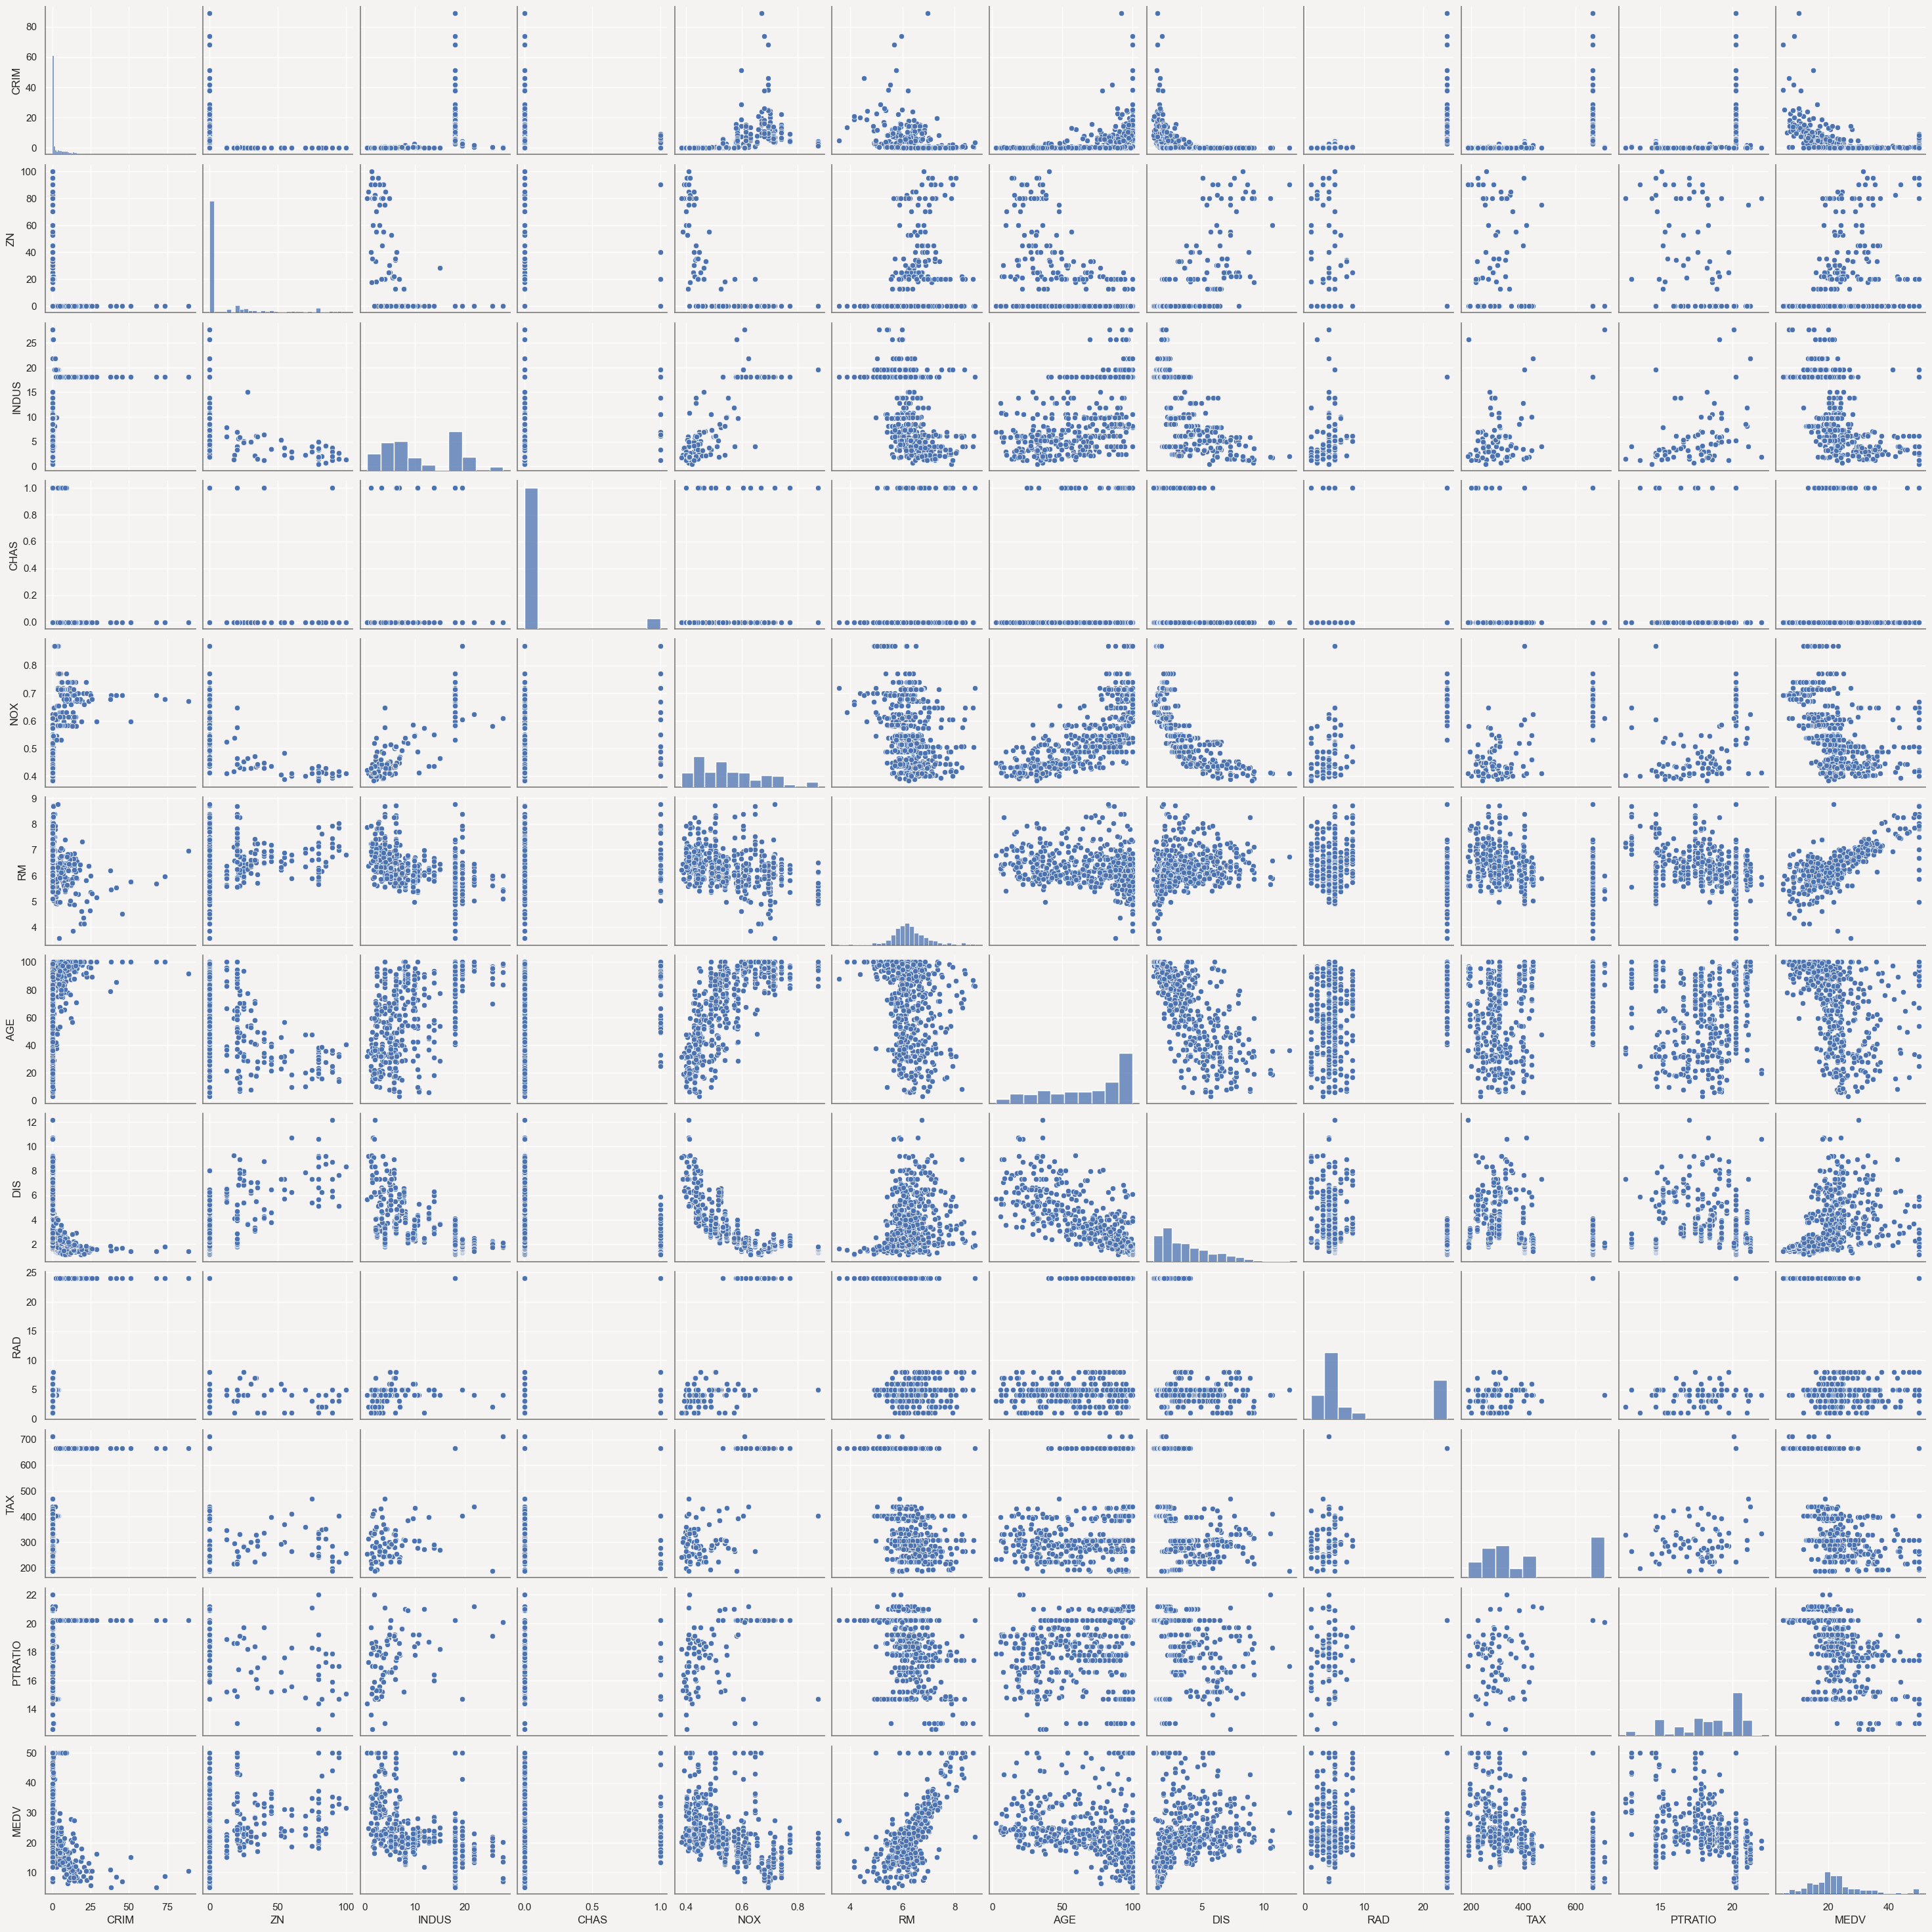

In [400]:
sns.pairplot(df)

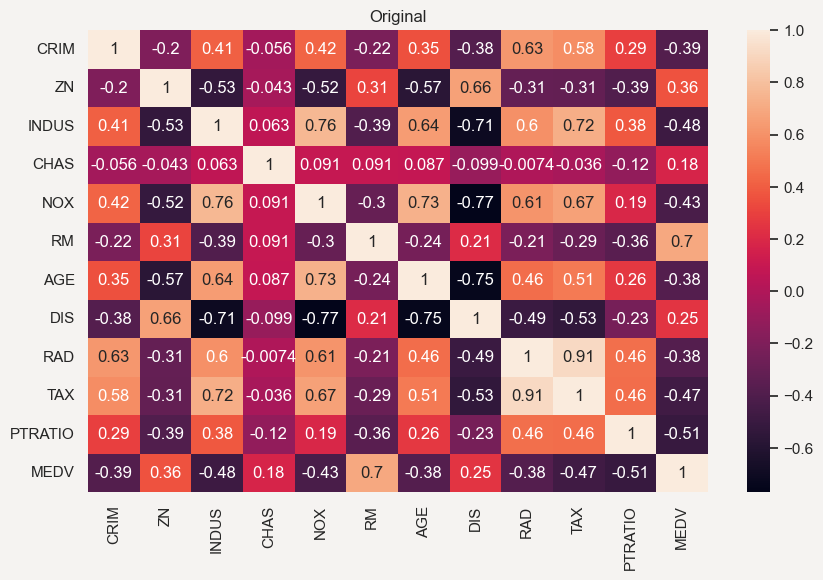

In [401]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True)
sns.set(rc={'axes.facecolor':'#f5f3f1', 'figure.facecolor':'#f5f3f1', 'axes.edgecolor':'grey', 'axes.grid':True, 'grid.color':'white'})
plt.title('Original')
plt.savefig(f'visuals/correlation.png')
plt.show()

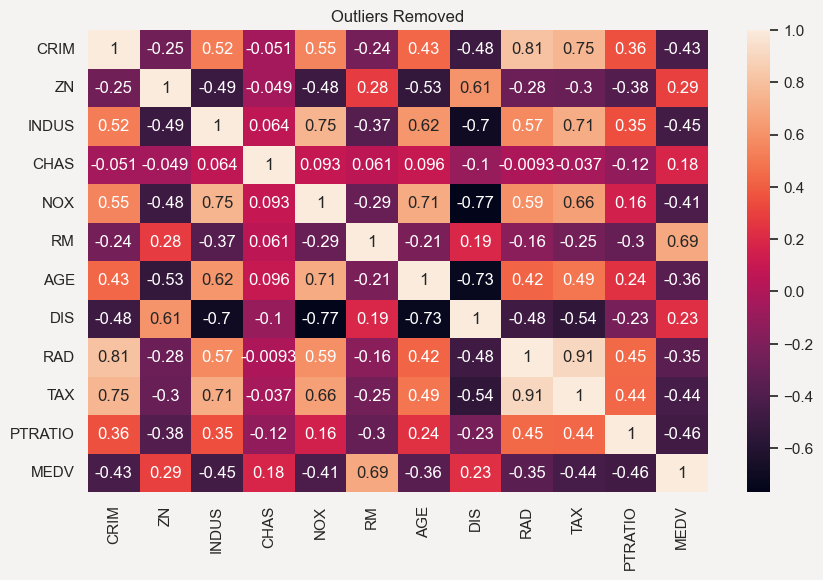

In [402]:
plt.figure(figsize=(10, 6))
sns.heatmap(outlied_df.corr(), annot = True)
sns.set(rc={'axes.facecolor':'#f5f3f1', 'figure.facecolor':'#f5f3f1', 'axes.edgecolor':'grey', 'axes.grid':True, 'grid.color':'white'})
plt.title('Outliers Removed')
plt.savefig(f'visuals/correlationInliers.png')
plt.show()

# Now to actually try to answer some questions (Experiment 1)

First, can we predict housing prices using linear regression?

In [403]:
X = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [404]:
linReg1 = LinearRegression()
linReg1.fit(X_train, y_train)

LinearRegression()

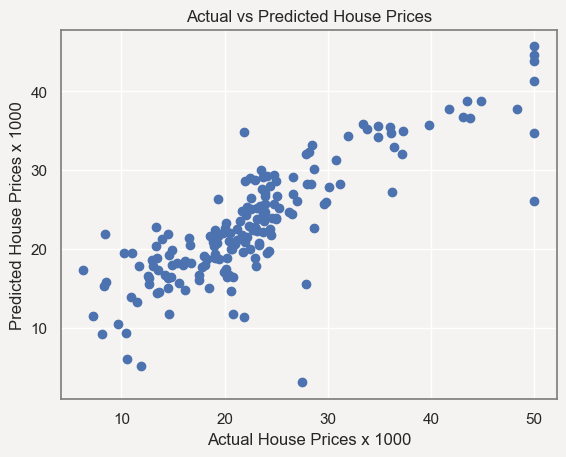

In [405]:
y_pred = linReg1.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices x 1000")
plt.ylabel("Predicted House Prices x 1000")
plt.title("Actual vs Predicted House Prices")
plt.savefig("visuals/linRegPricePrediction")
plt.show()

I can then use mean squared error to measure the average squared difference between the estimated values and the actual value.

In [406]:
print(mean_squared_error(y_test, y_pred))

25.969917298134284


Now I want to try the same thing with the outlied_df.

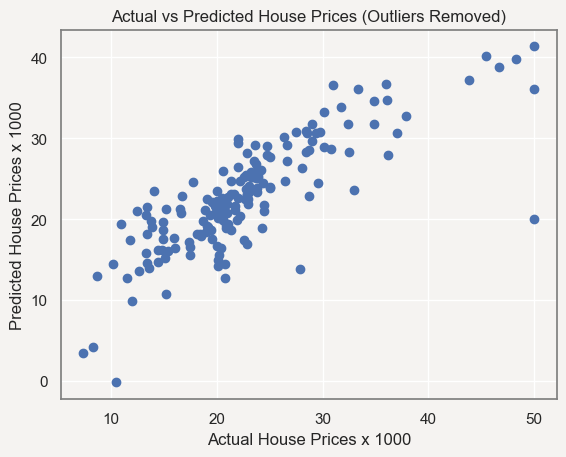

In [407]:
X2 = outlied_df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']]
y2 = outlied_df['MEDV']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.35, random_state=1)
linReg2 = LinearRegression()
linReg2.fit(X_train2, y_train2)
y_pred2 = linReg2.predict(X_test2)
plt.scatter(y_test2, y_pred2)
plt.xlabel("Actual House Prices x 1000")
plt.ylabel("Predicted House Prices x 1000")
plt.title("Actual vs Predicted House Prices (Outliers Removed)")
plt.savefig("visuals/linRegPricePredictionInliers")
plt.show()

In [408]:
print(mean_squared_error(y_test2, y_pred2))

22.14217825769689


# Experiment 2

Now I want to see how crime affects prices with linear regression.

In [409]:
X_crime = df[['CRIM']]
y_crime = df['MEDV']
X_train_crime, X_test_crime, y_train_crime, y_test_crime = train_test_split(X_crime, y_crime, test_size=0.3, random_state=1)
crime_reg = LinearRegression()
crime_reg.fit(X_train_crime, y_train_crime)

LinearRegression()

In [410]:
y_crime_pred = crime_reg.predict(X_test_crime)

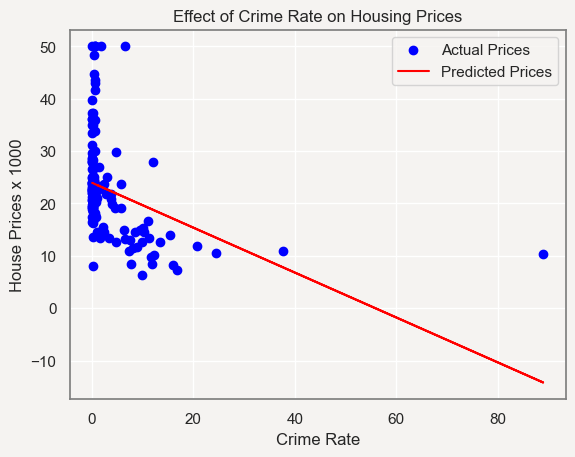

In [411]:
plt.scatter(X_test_crime, y_test_crime, color="blue", label="Actual Prices")
plt.plot(X_test_crime, y_crime_pred, color="red", label="Predicted Prices")
plt.xlabel("Crime Rate")
plt.ylabel("House Prices x 1000")
plt.title("Effect of Crime Rate on Housing Prices")
plt.legend()
plt.savefig("visuals/predictedCrime.png")
plt.show()

In [412]:
print(mean_squared_error(y_test_crime, y_crime_pred))

80.67297029010638


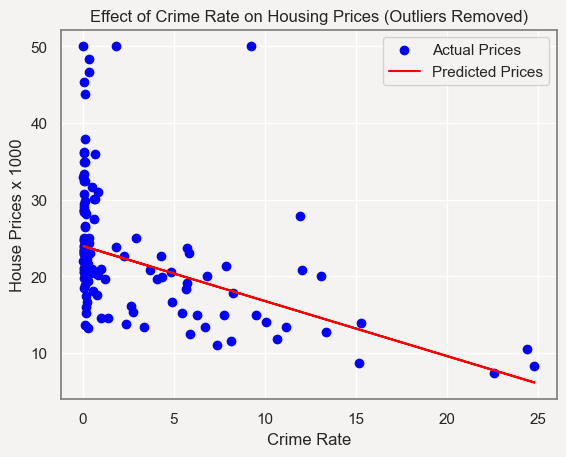

In [413]:
X_crime2 = outlied_df[['CRIM']]
y_crime2 = outlied_df['MEDV']
X_train_crime2, X_test_crime2, y_train_crime2, y_test_crime2 = train_test_split(X_crime2, y_crime2, test_size=0.3, random_state=1)
crime_reg2 = LinearRegression()
crime_reg2.fit(X_train_crime2, y_train_crime2)
y_crime_pred2 = crime_reg2.predict(X_test_crime2)
plt.scatter(X_test_crime2, y_test_crime2, color="blue", label="Actual Prices")
plt.plot(X_test_crime2, y_crime_pred2, color="red", label="Predicted Prices")
plt.xlabel("Crime Rate")
plt.ylabel("House Prices x 1000")
plt.title("Effect of Crime Rate on Housing Prices (Outliers Removed)")
plt.legend()
plt.savefig("visuals/predictedCrimeInliers.png")
plt.show()

In [414]:
print(mean_squared_error(y_test_crime2, y_crime_pred2))

56.595748628630155


In [415]:
model1 = sm.OLS(y_train_crime, X_train_crime).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.055
Model:                            OLS   Adj. R-squared (uncentered):              0.052
Method:                 Least Squares   F-statistic:                              20.57
Date:                Fri, 01 Nov 2024   Prob (F-statistic):                    7.89e-06
Time:                        21:11:28   Log-Likelihood:                         -1618.6
No. Observations:                 354   AIC:                                      3239.
Df Residuals:                     353   BIC:                                      3243.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [416]:
model1 = sm.OLS(y_train_crime2, X_train_crime2).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.101
Model:                            OLS   Adj. R-squared (uncentered):              0.098
Method:                 Least Squares   F-statistic:                              36.76
Date:                Fri, 01 Nov 2024   Prob (F-statistic):                    3.66e-09
Time:                        21:11:28   Log-Likelihood:                         -1493.2
No. Observations:                 330   AIC:                                      2988.
Df Residuals:                     329   BIC:                                      2992.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Experiment 3

Up until now I've been using linear regression but now I want to try using logistic regression to be able to predict if a house will have high property taxes.

In [417]:
tax_median = df['TAX'].median()
df['HIGH_TAX'] = (df['TAX'] > tax_median).astype(int)

In [418]:
tax_median_outlied = outlied_df['TAX'].median()
outlied_df.loc[:,'HIGH_TAX'] = (outlied_df['TAX'] > tax_median_outlied).astype(int)

C:\Users\filip\AppData\Local\Temp\ipykernel_13488\3836836806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlied_df.loc[:,'HIGH_TAX'] = (outlied_df['TAX'] > tax_median_outlied).astype(int)


In [420]:
X_tax = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO']]
y_tax = df['HIGH_TAX']
X_tax2 = outlied_df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO']]
y_tax2 = outlied_df['HIGH_TAX']


In [421]:
X_train_tax, X_test_tax, y_train_tax, y_test_tax = train_test_split(X_tax, y_tax, test_size=0.3, random_state=1)
X_train_tax2, X_test_tax2, y_train_tax2, y_test_tax2 = train_test_split(X_tax2, y_tax2, test_size=0.3, random_state=1)

In [422]:
logReg = LogisticRegression(max_iter=1000)
logReg.fit(X_train_tax, y_train_tax)
logReg2 = LogisticRegression(max_iter=1000)
logReg2.fit(X_train_tax2, y_train_tax2)

LogisticRegression(max_iter=1000)

In [423]:
y_pred_tax = logReg.predict(X_test_tax)
y_pred_tax2 = logReg2.predict(X_test_tax2)

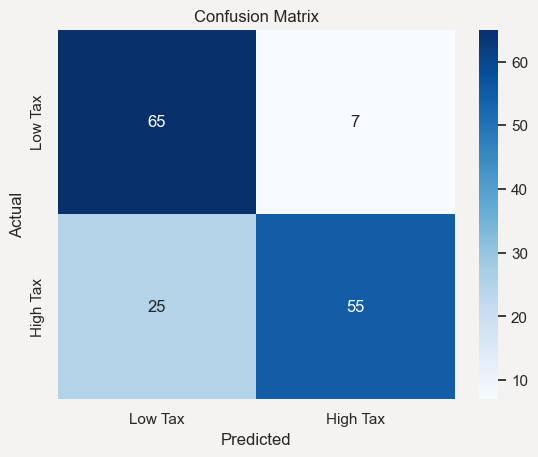

In [424]:
conf_matrix = confusion_matrix(y_test_tax, y_pred_tax)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Tax", "High Tax"], yticklabels=["Low Tax", "High Tax"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("visuals/confMatrix.png")
plt.show()

In [425]:
print(accuracy_score(y_test_tax, y_pred_tax))
print(classification_report(y_test_tax, y_pred_tax))

0.7894736842105263
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        72
           1       0.89      0.69      0.77        80

    accuracy                           0.79       152
   macro avg       0.80      0.80      0.79       152
weighted avg       0.81      0.79      0.79       152



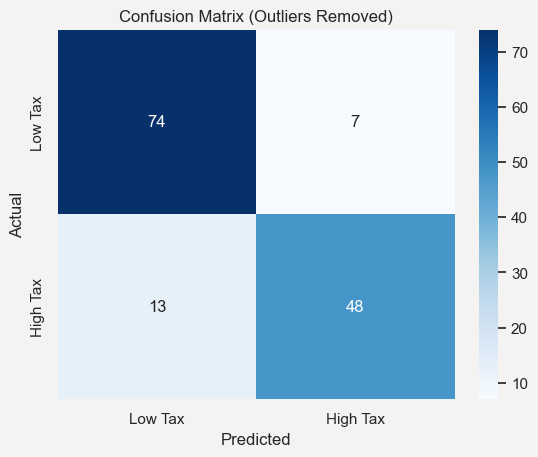

In [426]:
conf_matrix2 = confusion_matrix(y_test_tax2, y_pred_tax2)
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Tax", "High Tax"], yticklabels=["Low Tax", "High Tax"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Outliers Removed)")
plt.savefig("visuals/confMatrixInliers.png")
plt.show()

In [427]:
print(accuracy_score(y_test_tax2, y_pred_tax2))
print(classification_report(y_test_tax2, y_pred_tax2))

0.8591549295774648
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        81
           1       0.87      0.79      0.83        61

    accuracy                           0.86       142
   macro avg       0.86      0.85      0.85       142
weighted avg       0.86      0.86      0.86       142

